In [1]:
initial_dna_sequence = "A9B6C9D6E9F6G9H6I9J6K"
forward_9_positions=[1,5,9,13,17]#computer positions
    
backward_6_positions=[3,7,11,15,19]#computer positions

In [2]:
def prime(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        if inverse_composite[i]=='6':
            inverse_composite[i]='9'
        elif inverse_composite[i]=='9':
            inverse_composite[i]='6'
        elif inverse_composite[i].islower():
            inverse_composite[i]=inverse_composite[i].upper()
        elif inverse_composite[i].isupper():
            inverse_composite[i]=inverse_composite[i].lower()
        else:
            raise SyntaxError
    return inverse_composite

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+prime(DNA[site_1-1:site_2])+DNA[site_2:] 

import random

def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
    
    # Determine which function to use
    #Not yet complete,must know if <> is a flip
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        else :
            return 'DoNotCount'

In [3]:
def probability_calculation(DNA):
    # Dictionary to store counts of each outcome
    outcome_list=[{DNA:1}]

    for _ in range(25):
        outcome_list.append({})
    recombinases_event=  0


    # Run simulations
    for stage in outcome_list:
        if recombinases_event<len(outcome_list)-1:
            recombinases_event+=1      
            for stored_result,probabilities in list(stage.items()):
                stored_result=list(stored_result)
                num_arrows=0
                forward_9_positions=detect_forward_sites(stored_result,['9'])
                backward_6_positions=detect_backward_sites(stored_result,['6'])
                # Randomly select two sites
                combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
                if len(combined)>=2:
                    for i in range(len(combined)):
                        for j in range(i+1,len(combined)):
                            num_arrows+=1

                    for i in range(len(combined)):
                        for j in range(i+1,len(combined)):
                            choice1,choice2 = combined[i], combined[j]
                            
                    
                            output = evaluate_colour_CRE(stored_result,choice1,choice2)
                            if output!='DoNotCount':
                                formatted_output = "".join(output)
                                #print(formatted_output)#!!!Remove before flight  
                                if formatted_output not in outcome_list[recombinases_event]:
                                    outcome_list[recombinases_event][formatted_output] = 0
                                    outcome_list[recombinases_event][formatted_output] += probabilities/num_arrows
                                else:    
                                    outcome_list[recombinases_event][formatted_output] += probabilities/num_arrows
        print('stage',recombinases_event,'completed')
    return outcome_list

In [4]:
data={}

outcome_lists= probability_calculation(initial_dna_sequence)


stage 1 completed
stage 2 completed
stage 3 completed
stage 4 completed
stage 5 completed
stage 6 completed
stage 7 completed
stage 8 completed
stage 9 completed
stage 10 completed
stage 11 completed
stage 12 completed
stage 13 completed
stage 14 completed
stage 15 completed
stage 16 completed
stage 17 completed
stage 18 completed
stage 19 completed
stage 20 completed
stage 21 completed
stage 22 completed
stage 23 completed
stage 24 completed
stage 25 completed
stage 25 completed


In [5]:

stored_data=(outcome_lists)

In [6]:
import matplotlib.pyplot as plt
import numpy as np





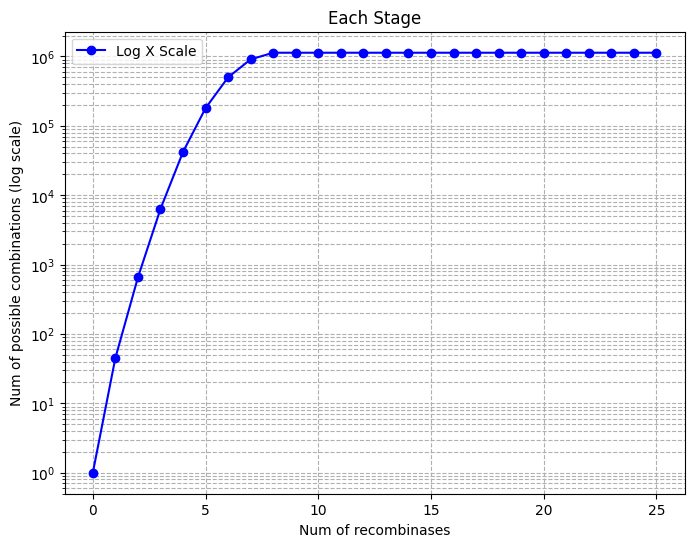

In [7]:
x=[]
y=[]
for i in range(len(outcome_lists)):
    x.append(i)
    if i==0:
        y.append(len(outcome_lists[i]))
    elif i >0:
        y.append(len(outcome_lists[i]))


# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot the line graph with log scale on the x-axis
plt.semilogy(x, y, marker='o', linestyle='-', color='b', label='Log X Scale')

# (Alternatively, for log y-axis: plt.semilogy(x, y, ...))
# (For both axes log: plt.loglog(x, y, ...))

# Add labels and title
plt.xlabel('Num of recombinases')
plt.ylabel('Num of possible combinations (log scale)')

plt.legend()
plt.grid(True, which="both", ls="--")
plt.title("Each Stage")

plt.show()

In [8]:
import math
def calculate_entropy(prob_dict):
    """
    Calculate Shannon entropy (in bits) for a dictionary of outcome probabilities.
    
    Args:
        prob_dict (dict): Dictionary where keys are outcomes and values are probabilities.
    
    Returns:
        float: Entropy in bits.
    """
    entropy = 0.0
    for prob in prob_dict.values():
        if prob > 0:  # Avoid log(0) which is undefined
            entropy -= prob * math.log2(prob)
    return entropy

[0.0, 5.491853096329673, 8.677052116799304, 9.973428042354502, 9.989998630022226, 9.269460421232392, 8.258162040465946, 7.236185548050688, 6.3339173587571755, 5.588298192110118, 4.99472576217452, 4.533062072419034, 4.179847459112252, 3.912931280959624, 3.71323269751902, 3.5650680733961497, 3.4559328756940983, 3.376059529506778, 3.3179379386151577, 3.275864858512783, 3.245554112122176, 3.2238129312143284, 3.208281496901581, 3.197227634819219, 3.1893877542469187, 3.1838452515519013]


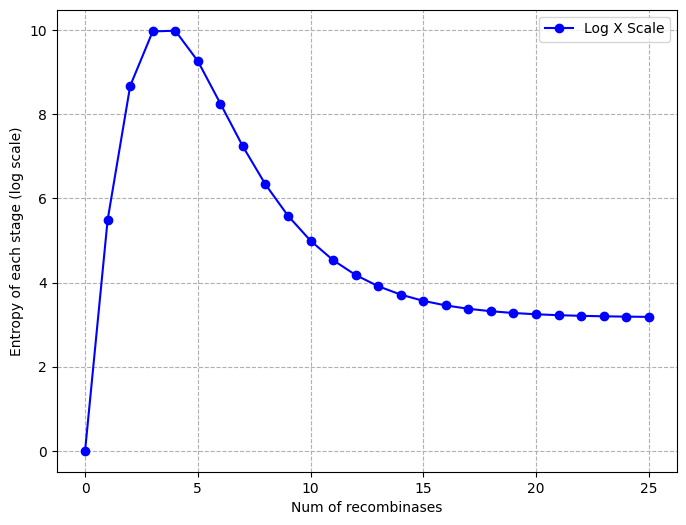

In [9]:
entropy_list=[]
for _ in outcome_lists:
    entropy_list.append(calculate_entropy(_))
print(entropy_list)
    
x=[]
y=[]
for i in range(len(entropy_list)):
    x.append(i)
    y.append(entropy_list[i])


# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot the line graph with log scale on the x-axis
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Log X Scale')

# (Alternatively, for log y-axis: plt.semilogy(x, y, ...))
# (For both axes log: plt.loglog(x, y, ...))

# Add labels and title
plt.xlabel('Num of recombinases')
plt.ylabel('Entropy of each stage (log scale)')
plt.title
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()